# Task 1: Classification

Here, I am creating the Classification models with Logistic Regression, KNN, Decision Tree and SVM models. Then, done hyperparameter tuning with GridSearchCV and compared the results with the existing evaluation result. Then, plotted the Confusion Matrix and generated the Classification Report.

# Data Exploration

Initially, I imported Loan dataset. Then, I dropped the first two columns from the dataset, which is not neccessary. After that, I done the exploration of the dataset.

In [253]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Imported loan dataset
loan_df = pd.read_csv('loan_train.csv')

# Dropped first two columns
loan_df = loan_df.drop(loan_df.columns[[0, 1]], axis=1)

# Find number of rows and columns of the dataset
print(loan_df.shape)

(346, 8)


After dropping the unnecessary columns and running the shape function of the dataset, we can see that the dataset has 346 rows and 8 columns. Then, I checked the first 5 rows of the dataset by running the head function of the dataset.

In [254]:
# Get first rows of the dataset
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [255]:
# Get column datatypes and check for null values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


After running the info function we got the data types of the columns and all 8 columns have Non-Null Count 346. That means, there is no missing values. We can confirm this by running 'loan_df.isnull().sum()' function.

In [256]:
# Check for null values
loan_df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

Here it is confirmed that, there is no missing values. Now, I am checking for duplicate values.

In [257]:
# Check for duplicates
loan_df_dup = loan_df[loan_df.duplicated(keep='first')]
loan_df_dup

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
13,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
18,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
29,PAIDOFF,1000,30,9/11/2016,10/10/2016,37,college,male
47,PAIDOFF,1000,30,9/11/2016,10/10/2016,27,High School or Below,male
52,PAIDOFF,1000,30,9/11/2016,10/10/2016,34,High School or Below,male
62,PAIDOFF,1000,15,9/11/2016,9/25/2016,25,college,male
69,PAIDOFF,800,15,9/11/2016,9/25/2016,33,college,male
79,PAIDOFF,1000,30,9/11/2016,10/10/2016,22,High School or Below,male
86,PAIDOFF,1000,30,9/11/2016,10/10/2016,31,High School or Below,male
89,PAIDOFF,800,15,9/11/2016,9/25/2016,29,college,male


After checking the duplicates I found that there are some duplicate rows. Now, I am going to check the count of the duplicate rows.

In [258]:
# Check number of duplicate rows
loan_df_dup.shape

(40, 8)

There are 40 duplicate rows. Now, I am going to delete those rows.

In [259]:
loan_df = loan_df.drop_duplicates(keep='first')
loan_df.shape

(306, 8)

After dropping 40 rows, now the dataset dropped to 306 rows. I am dropping columns 'effective_date' and 'due_date' from the dataframe since it is not significant for the classification

In [260]:
# Dropped columns 'effective_date' and 'due_date'
loan_df = loan_df.drop(['effective_date', 'due_date'], axis=1)

Now, I am going to transform categorical features to numeric

In [261]:
# Transform categorical values to numeric values
le_loan_status = LabelEncoder()
le_education = LabelEncoder()
le_gender = LabelEncoder()

loan_df['loan_status_n'] = le_loan_status.fit_transform(loan_df['loan_status'])
loan_df['education_n'] = le_education.fit_transform(loan_df['education'])
loan_df['Gender_n'] = le_gender.fit_transform(loan_df['Gender'])

loan_df

,loan_status,Principal,terms,age,education,Gender,loan_status_n,education_n,Gender_n
0,PAIDOFF,1000,30,45,High School or Below,male,1,1,1
1,PAIDOFF,1000,30,33,Bechalor,female,1,0,0
2,PAIDOFF,1000,15,27,college,male,1,3,1
3,PAIDOFF,1000,30,28,college,female,1,3,0
4,PAIDOFF,1000,30,29,college,male,1,3,1
...,...,...,...,...,...,...,...,...,...
340,COLLECTION,1000,30,26,college,male,0,3,1
341,COLLECTION,800,15,32,High School or Below,male,0,1,1
343,COLLECTION,800,15,39,college,male,0,3,1
344,COLLECTION,1000,30,28,college,male,0,3,1


Now, I am going to drop old categorical features

In [262]:
loan_df = loan_df.drop(['loan_status', 'education', 'Gender'], axis='columns')
loan_df

,Principal,terms,age,loan_status_n,education_n,Gender_n
0,1000,30,45,1,1,1
1,1000,30,33,1,0,0
2,1000,15,27,1,3,1
3,1000,30,28,1,3,0
4,1000,30,29,1,3,1
...,...,...,...,...,...,...
340,1000,30,26,0,3,1
341,800,15,32,0,1,1
343,800,15,39,0,3,1
344,1000,30,28,0,3,1


Now, I called the describe function to get the statistical distribution of the dataset.

In [263]:
loan_df.describe()

,Principal,terms,age,loan_status_n,education_n,Gender_n
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,940.196078,22.183007,31.179739,0.745098,1.725490,0.833333
std,113.015134,8.048572,6.192305,0.436520,1.163574,0.373288
min,300.000000,7.000000,18.000000,0.000000,0.000000,0.000000
25%,800.000000,15.000000,27.000000,0.000000,1.000000,1.000000
50%,1000.000000,30.000000,30.000000,1.000000,1.000000,1.000000
75%,1000.000000,30.000000,35.000000,1.000000,3.000000,1.000000
max,1000.000000,30.000000,51.000000,1.000000,3.000000,1.000000


After running the describe function we got the minimum value, maximum value, mean, median, standard deviation, 1st quantile and 3rd quantile of each and every numerical columns of the dataset. Data points below the 1st quantile and the data points above the 3rd quantile are outliers. Now, I am going to plot boxplot to check the outliers for all the columns.

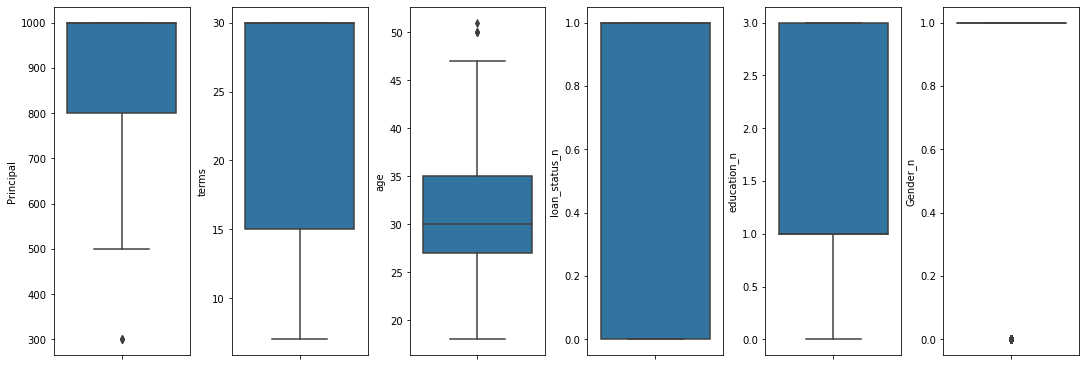

In [264]:
# Select numeric features from the dataset for the boxplot
loan_df_num  =  loan_df.select_dtypes(include=np.number)

# Outlier detection with the boxplot
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15, 5))
ax = ax.flatten()
index = 0

for i in loan_df_num.columns:
  sb.boxplot(y=i, data=loan_df_num, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

From the above boxplot, we can see data points below the 1st quantile and the data points above the 3rd quantile are outliers. Now, I am going to check the amount of outliers by feature.

In [265]:
# Checking outliers by features for the numeric columns
for i in loan_df_num.columns:
  loan_df_num.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(loan_df_num[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = loan_df_num[i][(loan_df_num[i] < lower_bound) | (loan_df_num[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/loan_df_num[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in Principal is 0.98% with count 3
Outliers in terms is 0.00% with count 0
Outliers in age is 1.31% with count 4
Outliers in loan_status_n is 0.00% with count 0
Outliers in education_n is 0.00% with count 0
Outliers in Gender_n is 16.67% with count 51


Here, we can see the feature 'age' has most outliers with 1.31%. The feature 'Principal' have outlier with 0.98%. While, the feature 'terms' don't have outliers at all. Now, I am calling the corr function to get the correlation of the features. Then, plotted the correlation in the heatmap.

In [266]:
# Get the correlation
corr = loan_df.corr()
corr

,Principal,terms,age,loan_status_n,education_n,Gender_n
Principal,1.000000,0.503365,-0.040342,-0.084052,-0.018040,-0.003886
terms,0.503365,1.000000,-0.042370,-0.121061,-0.014224,0.016733
age,-0.040342,-0.042370,1.000000,0.027922,-0.130098,0.027186
loan_status_n,-0.084052,-0.121061,0.027922,1.000000,0.003797,-0.140848
education_n,-0.018040,-0.014224,-0.130098,0.003797,1.000000,0.022646
Gender_n,-0.003886,0.016733,0.027186,-0.140848,0.022646,1.000000


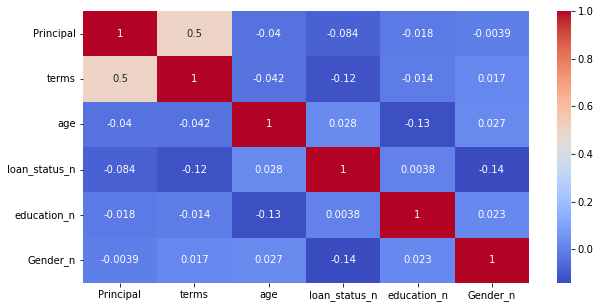

In [267]:
# Plotting the correlation in heatmap
plt.figure(figsize=(10, 5))

sb.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

After getting the heatmap of the correlation, we can see that, the feature 'Principal' has positive correlation with the feature 'terms'. Correlation of all other features are insignificant.

# Logistic Regression

Here, I am doing Logistic Regression Model with the dependent (target) variable 'loan_status'. All others are my independent variables. For getting the independent variables, I am using the drop function of the dataset and dropped the variable 'loan_status' and assigned to variable x. The target variable is 'loan_status', which is assigned to variable y. Then, I split the dataset into train and test data sets with 20% test data and 80% train samples, using the train_test_split function from the sklearn library. Then, fit the model with train dataset and predicted the model with the test dataset.

In [268]:
# Imported Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Created object of LogisticRegression
lor = LogisticRegression()

# Dropped column loan_status from the dataframe and assigned as x
x = loan_df.drop(['loan_status_n'], axis=1)

# Dependent variable (Target variable) sales is assigned as y
y = loan_df['loan_status_n']

# Creating test and training samples from the dataset with 20% test samples and 80% train samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Logistic regression model is trained with training data x_train and y_train
lor.fit(x_train, y_train)

# Print the intercept and the coefficients
print("The intercept is", lor.intercept_)
print("The coefficients are", lor.coef_)

# Predict the loan status with the logical regression model by passing the test data
y_pred = lor.predict(x_test)

print(y_pred)

The intercept is [0.11621578]
The coefficients are [[ 0.00093609 -0.03079617  0.04095504  0.01690767 -0.68009963]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Here, I created function for printing the evaluation results

In [269]:
def ModelEvaluation(model, y_test, y_pred):
  
    # Import Libraries
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
    
    # Calculate Accuracy of the model
    Accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    print("Accuracy of the", model, "Model is", Accuracy)
  
    # Calculate Precision of the model
    Precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
    print("Precision of the", model, "Model is", Precision)
  
    # Calculate True Positive Rate (Recall) of the model
    TPR = metrics.recall_score(y_true=y_test, y_pred=y_pred)
    print("True Positive Rate (Recall) of the", model, "Model is", TPR)
  
    # Calculate F Score of of the model
    F_Score = metrics.f1_score(y_true=y_test, y_pred=y_pred)
    print("F Score of the", model, "Model is", F_Score)
    
    # Calculate TNR(Specificity) of the model
    tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
    TNR = tn / (tn+fp)
    print("True Negative Rate(Specificity) of the", model, "Model is", TNR)    

Here, I created common function for plotting confusion matrix

In [270]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set1)
  categoryNames = ['Collection','Paidoff']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=12)
  plt.show()

Now, I am printing the evaluation metrics of the model.

In [271]:
# Print evaluation metrics
ModelEvaluation("Logistics Regression", y_test, y_pred)

Accuracy of the Logistics Regression Model is 0.7741935483870968
Precision of the Logistics Regression Model is 0.7741935483870968
True Positive Rate (Recall) of the Logistics Regression Model is 1.0
F Score of the Logistics Regression Model is 0.8727272727272727
True Negative Rate(Specificity) of the Logistics Regression Model is 0.0


Now, I am going to plot the confusion matrix of the model.

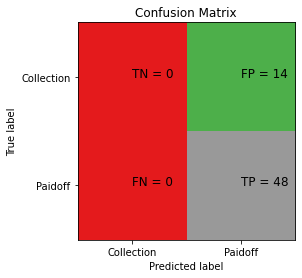

In [272]:
# import the library for plotting confusion matrix
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
Plot_confusion_matrix(y_test, y_pred)

From the Confusion Matrix generated, we can see True Positive is 48, True Negative is 0, False Positive is 14 and False Negative is 0.

Now, I am going to generate the classification report of the model

In [273]:
# Import Libraries
from sklearn.metrics import classification_report

# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, we can see Accuracy is 0.77, Precision is 0.77, True Positive Rate (Recall) is 1 and F1 Score is 0.87.

# K-Nearest Neighbors (KNN)

Here, I am doing K-Nearest Neighbors (KNN) for the classification.                                                                                                                       

In [274]:
# Imported Libraries
from sklearn.neighbors import KNeighborsClassifier

# Created object of KNN
knn = KNeighborsClassifier(n_neighbors=5)

# KNN model is trained with training data x_train and y_train
knn.fit(x_train, y_train)

# Predict the loan status with the KNN model by passing the test data
y_pred = knn.predict(x_test)

print(y_pred)

[0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]


Now, I am printing the evaluation metrics of the model.

In [275]:
ModelEvaluation("K-Nearest Neighbors (KNN)", y_test, y_pred)

Accuracy of the K-Nearest Neighbors (KNN) Model is 0.6774193548387096
Precision of the K-Nearest Neighbors (KNN) Model is 0.7592592592592593
True Positive Rate (Recall) of the K-Nearest Neighbors (KNN) Model is 0.8541666666666666
F Score of the K-Nearest Neighbors (KNN) Model is 0.8039215686274509
True Negative Rate(Specificity) of the K-Nearest Neighbors (KNN) Model is 0.07142857142857142


Now, I am using GridSearchCV to get the best hyperparameter for the KNN model

In [276]:
# Import library for the GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_neighbors': range(1, 50)}


# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best combination of hyperparameters
print(grid_search.best_params_)

{'n_neighbors': 29}


Here, I found out that KNN with No of Neighbours 29 gives the best result. Now, I am going to predict this KNN model and evaluate the results.

In [277]:
29# Predict the loan status with the KNN model by passing the test data
y_pred = grid_search.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [278]:
ModelEvaluation("K-Nearest Neighbors (KNN)", y_test, y_pred)

Accuracy of the K-Nearest Neighbors (KNN) Model is 0.7741935483870968
Precision of the K-Nearest Neighbors (KNN) Model is 0.7741935483870968
True Positive Rate (Recall) of the K-Nearest Neighbors (KNN) Model is 1.0
F Score of the K-Nearest Neighbors (KNN) Model is 0.8727272727272727
True Negative Rate(Specificity) of the K-Nearest Neighbors (KNN) Model is 0.0


Here, we can see there is improvement of the performance when the No of Neighbours of KNN is 29. I am going to generate the confusion matrix and the classification report of the model.

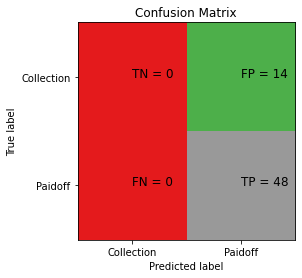

In [279]:
# Plot the confusion matrix
Plot_confusion_matrix(y_test, y_pred)

From the Confusion Matrix generated, we can see True Positive is 48, True Negative is 0, False Positive is 14 and False Negative is 0.

In [280]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, we can see Accuracy is 0.77, Precision is 0.77, True Positive Rate (Recall) is 1 and F1 Score is 0.87.

# Decision Tree

Here, I am doing Decision Tree for the classification

In [281]:
# Imported library for Decision Tree
from sklearn import tree

# Created object of Decision Tree
dt = tree.DecisionTreeClassifier()

# KNN model is trained with training data x_train and y_train
dt.fit(x_train, y_train)

# Predict the loan status with the KNN model by passing the test data
y_pred = dt.predict(x_test)

print(y_pred)

[0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1]


Now, I am printing the evaluation metrics of the model.

In [282]:
ModelEvaluation("Decision Tree", y_test, y_pred)

Accuracy of the Decision Tree Model is 0.5
Precision of the Decision Tree Model is 0.717948717948718
True Positive Rate (Recall) of the Decision Tree Model is 0.5833333333333334
F Score of the Decision Tree Model is 0.6436781609195402
True Negative Rate(Specificity) of the Decision Tree Model is 0.21428571428571427


Now, I am using GridSearchCV to get the best hyperparameter for the Decision Tree model

In [283]:
# Define the hyperparameter grid
param_grid = {'max_depth': range(1, 11),
              'min_samples_leaf': range(1, 11),
              'min_samples_split': range(1, 11),
              'criterion': ['gini', 'entropy']}

# Created object of Decision Tree
dt = tree.DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best combination of hyperparameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or

Here, I found out that Decision Tree model with Maximum depth 1, Minimum samples leaf 1, Minimum samples split 2 and criterion 'gini', gives the best result. Now, I am going to predict this Decision Tree model and evaluate the results.

In [284]:
# Predict the loan status with the Decision Tree model by passing the test data
y_pred = grid_search.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Now, I am printing the evaluation metrics of the model.

In [285]:
ModelEvaluation("Decision Tree", y_test, y_pred)

Accuracy of the Decision Tree Model is 0.7741935483870968
Precision of the Decision Tree Model is 0.7741935483870968
True Positive Rate (Recall) of the Decision Tree Model is 1.0
F Score of the Decision Tree Model is 0.8727272727272727
True Negative Rate(Specificity) of the Decision Tree Model is 0.0


Here, we can see there is improvement of the performance when the Maximum depth is 1, Minimum samples leaf is 1, Minimum samples split is 2 and criterion is 'gini'. I am going to generate the confusion matrix and the classification report of the model.

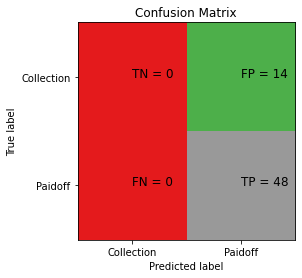

In [286]:
# Plot the confusion matrix
Plot_confusion_matrix(y_test, y_pred)

From the Confusion Matrix generated, we can see True Positive is 48, True Negative is 0, False Positive is 14 and False Negative is 0.

In [287]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, we can see Accuracy is 0.77, Precision is 0.77, True Positive Rate (Recall) is 1 and F1 Score is 0.87.

# Support Vector Machine (SVM)

Here, I am doing Support Vector Machine (SVM) for the classification

In [288]:
# Imported library for Support Vector Machine (SVM)
from sklearn.svm import SVC

# Created object of Support Vector Classifier
svm = SVC(kernel='sigmoid', C=1, random_state = 50)

# SVM model is trained with training data x_train and y_train
svm.fit(x_train, y_train)

# Predict the loan status with the SVM model by passing the test data
y_pred = svm.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Now, I am printing the evaluation metrics of the model.

In [289]:
ModelEvaluation("Support Vector Machine (SVM)", y_test, y_pred)

Accuracy of the Support Vector Machine (SVM) Model is 0.7741935483870968
Precision of the Support Vector Machine (SVM) Model is 0.7741935483870968
True Positive Rate (Recall) of the Support Vector Machine (SVM) Model is 1.0
F Score of the Support Vector Machine (SVM) Model is 0.8727272727272727
True Negative Rate(Specificity) of the Support Vector Machine (SVM) Model is 0.0


Now, I am using GridSearchCV to get the best hyperparameter for the SVM model

In [290]:
# Imported the library for the uniform function
from scipy.stats import uniform

# Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-1, 1, 10),
    'kernel': ['linear', 'rbf', 'sigmoid'],    
    '12h ':  [1, 0.1, 0.01, 0.001, 0.0001]
}

# Created object of SVM
svm = SVC(random_state = 55)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best combination of hyperparameters
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


Here, I found out that Support Vector Machine (SVM) model with C 0.1, gamma 1 and kernel 'linear', gives the best result. Now, I am going to predict this SVM model and evaluate the results.

In [291]:
# Predict the loan status with the SVM model by passing the test data
y_pred = grid_search.predict(x_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [292]:
ModelEvaluation("Support Vector Machine (SVM)", y_test, y_pred)

Accuracy of the Support Vector Machine (SVM) Model is 0.7741935483870968
Precision of the Support Vector Machine (SVM) Model is 0.7741935483870968
True Positive Rate (Recall) of the Support Vector Machine (SVM) Model is 1.0
F Score of the Support Vector Machine (SVM) Model is 0.8727272727272727
True Negative Rate(Specificity) of the Support Vector Machine (SVM) Model is 0.0


Here, we can see there is no difference of the performance when the C is 0.1, gamma is 1 and kernel is 'linear'. Now, I am going to generate the confusion matrix and the classification report of the model.

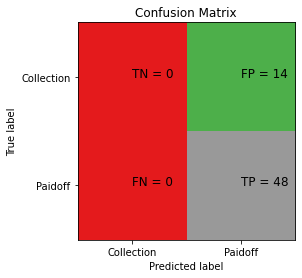

In [293]:
# Plot the confusion matrix
Plot_confusion_matrix(y_test, y_pred)

From the Confusion Matrix generated, we can see True Positive is 48, True Negative is 0, False Positive is 14 and False Negative is 0.

In [294]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      1.00      0.87        48

    accuracy                           0.77        62
   macro avg       0.39      0.50      0.44        62
weighted avg       0.60      0.77      0.68        62



C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, we can see Accuracy is 0.77, Precision is 0.77, True Positive Rate (Recall) is 1 and F1 Score is 0.87.

# Conclusion

Initially, I done data exploration and preprocessing of the dataset. When done data exploration, I found out there are no null values. But, there are 40 duplicate rows. I deleted these duplicate rows. Then, I dropped features 'effective_date' and 'due_date', which are insignificant features for the evaluation. Then, converted categorical features 'loan_status', 'education' and 'Gender' to numerical values and assigned these values to new features 'loan_status_n' 'education_n' and 'Gender_n' respectively. Then, dropped the existing featues 'loan_status', 'education' and 'Gender'.

Then, I created the Classification models with Logistic Regression, KNN, Decision Tree and SVM models. Then, done hyperparameter tuning with GridSearchCV and compared the results with the existing evaluation result. Then, plotted the Confusion Matrix and generated the Classification Report.

Initially, I created Logistics Regression Model and got Accuracy as 0.7741935483870968, Precision as 0.7741935483870968, True Positive Rate (Recall) as 1.0, F Score as 0.8727272727272727 and True Negative Rate(Specificity) of the Logistics Regression Model as 0.0. Since there is no common hyperparameter for Logistics Regression, I am not doing hyperparameter tuning.

Then, I created K-Nearest Neighbors (KNN) Model with hyperparameter value of 'No of Neighbors' as 5. I got Accuracy as 0.6774193548387096, Precision as 0.7592592592592593, True Positive Rate (Recall) as 0.8541666666666666, F Score as 0.8039215686274509 and True Negative Rate(Specificity) of the KNN Model as 0.07142857142857142. I done the hyperparameter tuning and got the best parameter for 'No of Neighbors' as 29. Then, predicted the model with the new hyperparameter. I saw there is improvement in the performance after hyperparameter tuning. After hyperparameter tuning, I got Accuracy as 0.7741935483870968, Precision as 0.7741935483870968, True Positive Rate (Recall) as 1.0, F Score as 0.8727272727272727 and True Negative Rate(Specificity) of the Logistics Regression Model as 0.0.

Then, I created Decision Tree Model and got Accuracy as 0.5, Precision as 0.717948717948718, True Positive Rate (Recall) as 0.5833333333333334, F Score as 0.6436781609195402 and True Negative Rate(Specificity) of the Decision Tree Model as 0.21428571428571427. I done the hyperparameter tuning and got the best parameters for Maximum depth as 1, Minimum samples leaf as 1, Minimum samples split as 2 and criterion as 'gini'. Then, predicted the model with new hyperparameters. I saw there is improvement in the performance after hyperparameter tuning. After hyperparameter tuning, I got Accuracy as 0.7741935483870968, Precision as 0.7741935483870968, True Positive Rate (Recall) as 1.0, F Score as 0.8727272727272727 and True Negative Rate(Specificity) of the Logistics Regression Model as 0.0.

Then, I created Support Vector Machine (SVM) Model with hyperparameter values of kernel as 'sigmoid' and C as 1. Accuracy as 0.7741935483870968, Precision as 0.7741935483870968, True Positive Rate (Recall) as 1.0, F Score as 0.8727272727272727 and True Negative Rate(Specificity) of the SVM Model as 0.0. I done the hyperparameter tuning and got the best parameter for C as 0.1, gamma as 1 and kernel as 'linear'. Then, predicted the model with new hyperparameters. The evaluation result is same here, even after the hyperparameter tuning.

Initially, I got different evaluation results for Logistic Regression, KNN, Decision Tree and SVM models. But, after the hyperparameter tuning, I got same evaluation results for all these models.